In [2]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob

In [3]:
import re
import numpy as np
import pandas as pd

def mpt_to_df(filename, eis=False):
    with open(filename) as f:
        content = f.readlines()
  
    ## Changed 02/12/2022 for compatibility with Biologic outputs without long header
    if content[0].split("\t")[0] == "mode":
        n_header_lines = 1
    else:
    ## Changed 20/12/2023 to warn about empty data files without terminating notebook cell
        try:
            n_header_lines = int(re.findall("\d+", content[1])[0])
        except:
            print ("Failed to load, please check data file")
            return
    column_headers = content[n_header_lines-1].strip("\n").split("\t")[:-1]
    
    ## Changed 20/12/2023 for datafile with incomplete last line (unknown reason?)
    data_list = []
    for nline, line in enumerate(content[n_header_lines:]):
        line_entries = line.strip("\n").split("\t")
        if len(line_entries) == len(column_headers):
            data_list.append(line_entries)
        else:
            print("Omitting line {} of {}".format(nline, len(content[n_header_lines:])))
    data = np.array(data_list, dtype=float)
    
    if eis == False:
        return pd.DataFrame(data, columns=column_headers)
    else:
        frequencies = np.unique(data[:, 0])
        cycle_id = np.array([item for sublist in [[n]*frequencies.shape[0] for n in range(int(data.shape[0]/frequencies.shape[0]))] 
                             for item in sublist]).reshape(data.shape[0], 1)

        EIS_data_labelled = np.hstack((cycle_id, data))

        column_headers.insert(0, "Cycle id")

        return pd.DataFrame(EIS_data_labelled, columns=column_headers)

In [36]:
df = mpt_to_df("250121_LiS64_Li-S_cell2_restart_restart_CA2.mpt")

In [37]:
df.columns

Index(['mode', 'ox/red', 'error', 'control changes', 'Ns changes',
       'counter inc.', 'Ns', 'I Range', 'time/s', 'control/mA', 'Ecell/V',
       'I/mA', 'dq/mA.h', '(Q-Qo)/mA.h', 'Q charge/discharge/mA.h',
       'half cycle', 'Energy/W.h', 'Energy charge/W.h', 'Energy discharge/W.h',
       'Capacitance charge/µF', 'Capacitance discharge/µF', 'step time/s', 'x',
       'Q discharge/mA.h', 'Q charge/mA.h', 'Capacity/mA.h', 'Efficiency/%',
       'cycle number', 'P/W', 'R/Ohm'],
      dtype='object')

In [38]:
## Find discharge data
df.loc[df["cycle number"]==1]

,mode,ox/red,error,control changes,Ns changes,counter inc.,Ns,I Range,time/s,control/mA,...,Capacitance discharge/µF,step time/s,x,Q discharge/mA.h,Q charge/mA.h,Capacity/mA.h,Efficiency/%,cycle number,P/W,R/Ohm
2728,1.0,1.0,0.0,1.0,1.0,1.0,0.0,116.0,27229.629293,0.5715,...,0.000000e+00,0.000000,0.000008,0.000000,3.171478e-07,3.171478e-07,0.00000,1.0,0.001047,3212.8113
2729,1.0,1.0,0.0,1.0,0.0,1.0,0.0,116.0,27239.629294,0.5715,...,0.000000e+00,10.000000,0.000008,0.000000,1.587955e-03,1.587955e-03,0.00000,1.0,0.001277,3908.4744
2730,1.0,1.0,0.0,1.0,0.0,1.0,0.0,116.0,27249.629294,0.5715,...,0.000000e+00,20.000001,0.000008,0.000000,3.175614e-03,3.175614e-03,0.00000,1.0,0.001288,3944.6533
2731,1.0,1.0,0.0,1.0,0.0,1.0,0.0,116.0,27259.629295,0.5715,...,0.000000e+00,30.000001,0.000008,0.000000,4.763282e-03,4.763282e-03,0.00000,1.0,0.001295,3963.4756
2732,1.0,1.0,0.0,1.0,0.0,1.0,0.0,116.0,27269.629295,0.5715,...,0.000000e+00,40.000002,0.000008,0.000000,6.350947e-03,6.350947e-03,0.00000,1.0,0.001300,3976.2324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,1.0,0.0,0.0,0.0,0.0,1.0,1.0,116.0,64720.211074,-0.5715,...,1.123648e+07,19340.000919,0.000009,3.070000,0.000000e+00,3.070000e+00,0.00000,1.0,-0.001031,3155.3496
6481,1.0,0.0,0.0,0.0,0.0,1.0,1.0,116.0,64730.211075,-0.5715,...,1.123060e+07,19350.000919,0.000009,3.071587,0.000000e+00,3.071587e+00,0.00000,1.0,-0.001030,3153.8835
6482,1.0,0.0,0.0,0.0,0.0,1.0,1.0,116.0,64740.211075,-0.5715,...,1.122428e+07,19360.000920,0.000009,3.073175,0.000000e+00,3.073175e+00,0.00000,1.0,-0.001029,3152.2395
6483,1.0,0.0,0.0,0.0,0.0,1.0,1.0,116.0,64750.211075,-0.5715,...,1.121842e+07,19370.000920,0.000009,3.074762,0.000000e+00,3.074762e+00,0.00000,1.0,-0.001029,3150.2297


In [55]:
import matplotlib as mpl

In [57]:
mpl.colors?

<IPython.core.display.Javascript object>


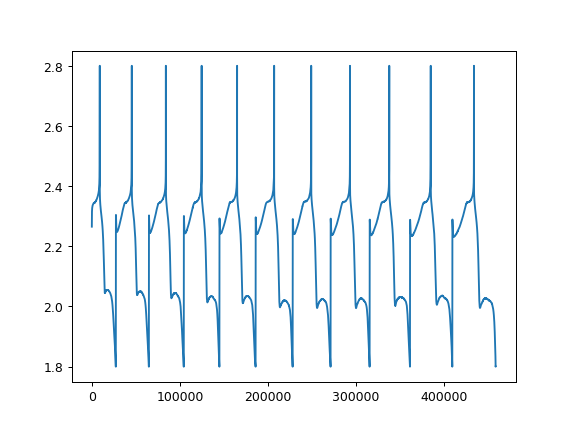

In [39]:
fig, ax = plt.subplots()
ax.plot(df["time/s"], df["Ecell/V"])

<IPython.core.display.Javascript object>


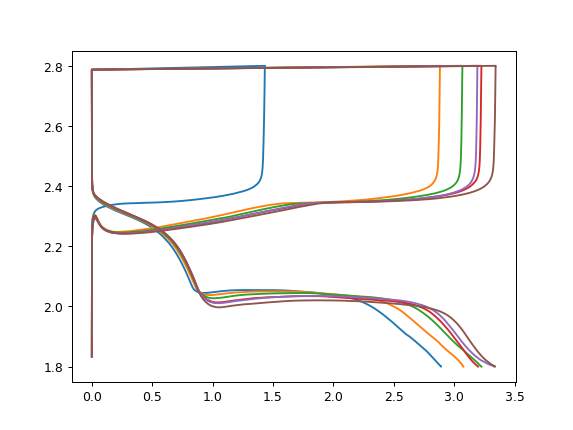

In [40]:
fig, ax = plt.subplots()
for cycle_number in [0, 1, 2, 3, 4, 5]:
    ax.plot(df.loc[df["cycle number"]==cycle_number]["Capacity/mA.h"], df.loc[df["cycle number"]==cycle_number]["Ecell/V"])

In [45]:
# cycle_number = df["cycle number"].max()
cycle_number = 0
charge = df.loc[(df["cycle number"]==cycle_number) & (np.sign(df["I/mA"])==1)]
discharge = df.loc[(df["cycle number"]==cycle_number) & (np.sign(df["I/mA"])==-1)]

<IPython.core.display.Javascript object>


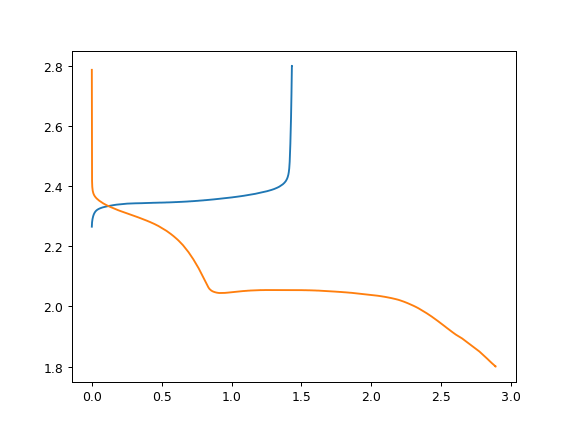

In [46]:
fig, ax = plt.subplots()
ax.plot(charge["Capacity/mA.h"], charge["Ecell/V"])
ax.plot(discharge["Capacity/mA.h"], discharge["Ecell/V"])